# Exercise 9
***

In [1]:
from scipy import stats as sp
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

## 1.

In [2]:
ave = 6.3
ave_15 = 15
x = np.arange(1, 30)

In [3]:
f = sp.poisson.pmf(x, ave)
g = sp.poisson.pmf(ave_15, ave)

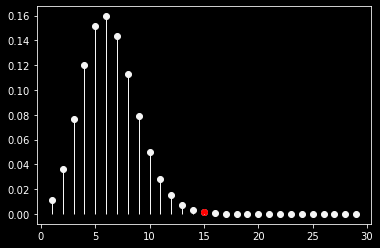

In [4]:
plt.scatter(x, f, color='whitesmoke', marker='o')
plt.scatter(ave_15, g, color='red', marker='o')
plt.vlines(x,0, f, label='hist. average', color='whitesmoke', lw=1)
plt.vlines(ave_15, 0,g, label='2015',color='red', lw=2)
plt.show()

In [211]:
prob = (1. - sp.poisson.cdf(ave_15, mu=ave))

In [212]:
print('Prop. that there are 15 or more Hurricanes in one year {:.3f}'.format(pvalue))

Prop. that there are 15 or more Hurricanes in one year 0.167


It is very unlikely to happen.

## 2.

In [7]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

In [8]:
sigma = np.sqrt((np.std(pre) ** 2 + np.std(post) ** 2)/2)
T = (np.mean(pre) - np.mean(post))/(sigma * np.sqrt(2/len(pre)))

In [9]:
pvalue = sp.t.cdf(T, len(pre) - 1) + (1. - sp.t.cdf(-T, len(pre) - 1))

In [10]:
pvalue

0.0031489409354536393

So the change in blood pressure was statistically significant

## 3.

In [12]:
data = np.loadtxt('/Users/max/data/populations.txt')

In [15]:
from scipy import fftpack
import pandas as pd

In [16]:
data = pd.DataFrame(data)

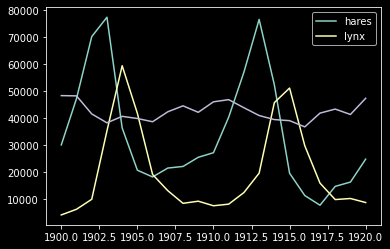

In [23]:
plt.plot(data[0], data[1], label='hares')
plt.plot(data[0], data[2], label='lynx')
plt.plot(data[0], data[3])
plt.legend()
plt.show()

In [37]:
lynx_fft = fftpack.fft(list(data[2]))
hares_fft = fftpack.fft(list(data[1]))
lynx_pow = np.abs(lynx_fft)
hares_pow = np.abs(hares_fft)

In [101]:
lynx_freq = fftpack.fftfreq(len(data[2]), d=np.abs(data[0][0]-data[0][1]))
hares_freq = fftpack.fftfreq(len(data[1]), d=np.abs(data[0][0]-data[0][1]))

Text(0.5, 1.0, 'Hares')

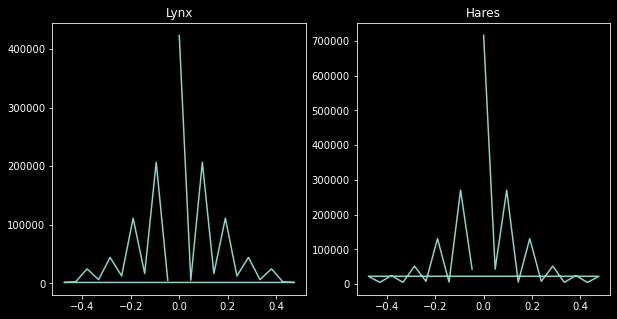

In [102]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(lynx_freq, lynx_pow)
ax[0].set_title('Lynx')
ax[1].plot(hares_freq, hares_pow)
ax[1].set_title('Hares')

Weird rise at 0. So use a mask

In [113]:
mask = (lynx_freq > 0.001) | (lynx_freq < -0.001)
mask = (hares_freq > 0.001) | (hares_freq < -0.001)

Text(0.5, 1.0, 'Hares')

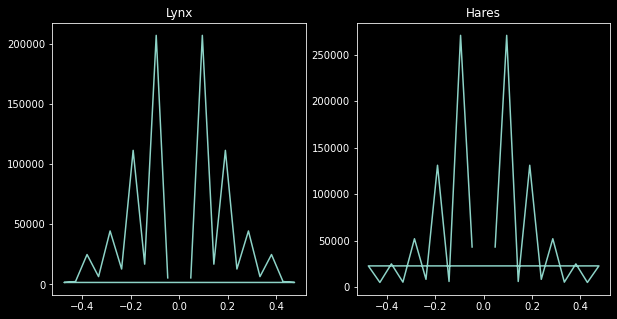

In [718]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(lynx_freq[mask], lynx_pow[mask])
ax[0].set_title('Lynx')
ax[1].plot(hares_freq[mask], hares_pow[mask])
ax[1].set_title('Hares')

In [121]:


print('Peak freq lynx :{:.4f}'.format(lynx_freq[mask][lynx_pow[mask].argmax()]))
print('Peak freq hares :{:.4f}'.format(hares_freq[mask][hares_pow[mask].argmax()]))

Peak freq lynx :0.0952
Peak freq hares :0.0952


In [126]:
print('So we have period of {:.2f} years.'.format(1/lynx_freq[mask][lynx_pow[mask].argmax()]))

So we have period of 10.50 years.


## 4.

In [709]:
pic = plt.imread('/Users/max/data/moonlanding.png')

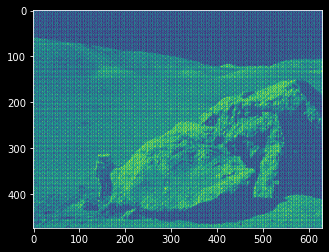

In [710]:
plt.imshow(pic)

In [711]:
pic_fft = (fftpack.fft2(pic))
pic_freq = fftpack.fftfreq(len(pic), d=abs(pic[0][0] - pic[0][1]))

/Users/max/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


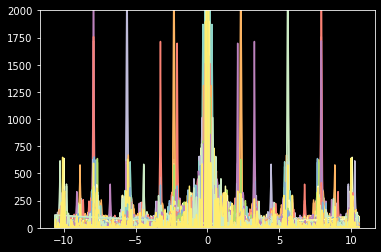

In [712]:
plt.plot(pic_freq, pic_fft)
plt.ylim(0, 2000)
plt.show()

In [713]:
main_freq = pic_fft
n = 50
for i in range(50): # filters the n's biggest peaks
    noise = main_freq.argmax()
    main_freq.ravel()[noise] = 0

/Users/max/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


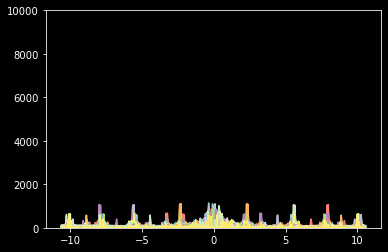

In [714]:
plt.plot(pic_freq, main_freq)
plt.ylim(0, 10000)
plt.show()

In [715]:
filtered = np.real(fftpack.ifft2(main_freq))

Text(0.5, 1.0, 'Original')

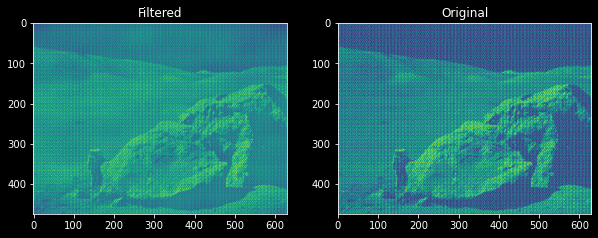

In [719]:
fig, ax = plt.subplots(1, 2, figsize=(10,6))
ax[0].imshow(filtered)
ax[0].set_title('Filtered')
ax[1].imshow(data)
ax[1].set_title('Original')